In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Reading the dataset

In [3]:
data=pd.read_csv('../input/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's analyse what factors are responsible for cause of heart disease

Creating a training and testing dataset

In [5]:
msk=np.random.rand(len(data))<0.8
train_df=data[msk]
test_df=data[~msk]

In [7]:
len(train_df)

247

In [8]:
len(test_df)

56

In [9]:
from sklearn import ensemble

In [11]:
train_df_x=train_df.drop(columns=['target'])
train_df_y=train_df.target

test_df_x=test_df.drop(columns=['target'])
test_df_y=test_df.target

In [ ]:
regr1=ensemble.RandomForestClassifier()

In [13]:
regr1.fit(train_df_x,train_df_y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
from sklearn.metrics import accuracy_score

In [16]:
train_ac=accuracy_score(regr1.predict(train_df_x),train_df_y)
train_ac

0.9878542510121457

In [17]:
test_ac=accuracy_score(regr1.predict(test_df_x),test_df_y)
test_ac

0.875

Let's look at the feature importance

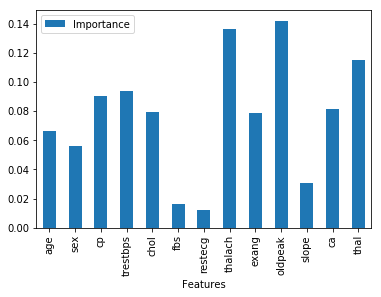

In [42]:
pd.DataFrame({'Features':train_df_x.columns,'Importance':regr1.feature_importances_}).plot.bar(x='Features')

Let's see what happens when we use Gradient Boosted Classifier

In [36]:
gbt=ensemble.GradientBoostingClassifier()

In [37]:
gbt.fit(train_df_x,train_df_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [38]:
train_ac=accuracy_score(gbt.predict(train_df_x),train_df_y)
train_ac

0.9959514170040485

In [40]:
test_ac=accuracy_score(gbt.predict(test_df_x),test_df_y)
test_ac

0.7678571428571429

This shows GBT had overfitting problem.

It is learning well on train model, but can't apply the same on test model.

Let's look at Feature Importance

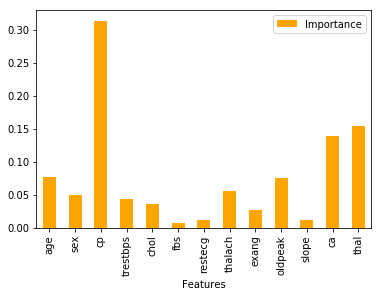

In [64]:
pd.DataFrame({'Features':train_df_x.columns,'Importance':gbt.feature_importances_}).plot.bar(x='Features',color='orange')

As you can see, both the models give different degree of feature importances.

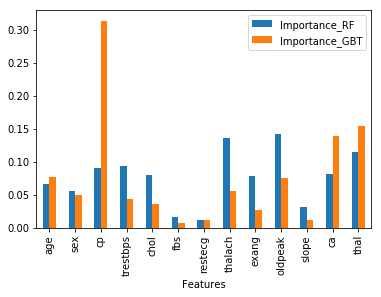

In [62]:
pd.DataFrame({'Features':train_df_x.columns,
              'Importance_RF':regr1.feature_importances_,
              'Importance_GBT':gbt.feature_importances_}).plot.bar(x='Features')